# Importing libraries and loading the dataset

Required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#This step needs to be executed in case notebook is executed in google colab.
from google.colab import files
  
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


Loading SeoulBikeData dataset from csv file

In [5]:
data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [6]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Data Cleaning and Preparation

Adding new 'Quarter' column to the data for grouping months into four quarters (Q1,Q2,Q3,Q4).

In [7]:
# Changing the date format for m/d/Y to Y/m/d
data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")

def determine_quarter(x):
    if (x >=1 and x <=3):
        return "Q1"          #January-March
    elif (x >= 4 and x <=6):
        return "Q2"          #April-June
    elif (x >= 7 and x <=9):
        return "Q3"          #July-September
    elif (x >=10 and x <=12):
        return "Q4"          #October-December
    
data['Quarter'] = data['Date'].dt.month.apply(determine_quarter)
data['Quarter'].value_counts()

Q4    2208
Q3    2208
Q2    2184
Q1    2160
Name: Quarter, dtype: int64

Adding new 'Request Time Slot' column to data for grouping 24 hours into 6 time slots namely
[0-5], [7-12], [13-18], [19-24].

In [8]:
def determine_timeSlot(x):
    if (x >=0 and x <=5):
        return "[0-5]"           
    elif (x >=6 and x <=12):
        return "[6-12]"           
    elif (x >=13 and x <=18):
        return "[13-18]"          
    elif (x >=19 and x <=24):
        return "[19-24]"

data['Request Time Slot'] = data['Hour'].apply(determine_timeSlot)
data['Request Time Slot'].value_counts()    

[6-12]     2555
[0-5]      2190
[13-18]    2190
[19-24]    1825
Name: Request Time Slot, dtype: int64

Adding new 'Rush Hour' column to data for checking if requests came in during rush hour(1) or not(0).

In [9]:
def determine_rushHour(x):
    if (x >=6 and x <=8) or (x >=17 and x <=19):
        return 1          
    else:
        return 0
    
data['Rush Hour'] = data['Hour'].apply(determine_rushHour)
data['Rush Hour'].value_counts()    

0    6570
1    2190
Name: Rush Hour, dtype: int64

Viewing data after addition of three new features.

In [10]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Quarter,Request Time Slot,Rush Hour
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Q4,[0-5],0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Q4,[0-5],0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Q4,[0-5],0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Q4,[0-5],0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Q4,[0-5],0


# Data Exploration

Checking missing values for all columns

In [11]:
data.isna().sum(axis=0)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Quarter                      0
Request Time Slot            0
Rush Hour                    0
dtype: int64

Checking summary statistics for each column

In [12]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rush Hour
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.250000
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.433037
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.250000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000


Class Imbalance for distribution of target variable (Rented Bike Count) with respect to catgorical variables such as 'Seasons', 'Request Time Slot', 'Holiday', 'Rush Hour', 'Quarter', 'Functioning Day'.

In [13]:
# Checking distribution of Rented Bike Count for each Season
data.groupby(by=['Seasons'])['Rented Bike Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

In [14]:
# Checking distribution of Rented Bike Count for each Request Time Slot.
print('Total number of bikes rented by time slot',data.groupby(by=['Request Time Slot'])['Rented Bike Count'].sum())
print('Average number of bikes rented by time slot',data.groupby(by=['Request Time Slot'])['Rented Bike Count'].mean())

Total number of bikes rented by time slot Request Time Slot
[0-5]       636662
[13-18]    2151060
[19-24]    1784662
[6-12]     1599930
Name: Rented Bike Count, dtype: int64
Average number of bikes rented by time slot Request Time Slot
[0-5]      290.713242
[13-18]    982.219178
[19-24]    977.896986
[6-12]     626.195695
Name: Rented Bike Count, dtype: float64


In [15]:
# Checking distribution of Rented Bike Count for Holiday.
data.groupby(by=['Holiday'])['Rented Bike Count'].sum()

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [16]:
# Checking distribution of Rented Bike Count for Rush Hour.
print('total number of bikes rented by rush hour',data.groupby(by=['Rush Hour'])['Rented Bike Count'].sum())
print('Average number of bikes rented by rush hour',data.groupby(by=['Rush Hour'])['Rented Bike Count'].mean())

total number of bikes rented by rush hour Rush Hour
0    4075077
1    2097237
Name: Rented Bike Count, dtype: int64
Average number of bikes rented by rush hour Rush Hour
0    620.255251
1    957.642466
Name: Rented Bike Count, dtype: float64


In [17]:
# Checking distribution of Rented Bike Count for each Quarter.
data.groupby(by=['Quarter'])['Rented Bike Count'].sum()

Quarter
Q1     682433
Q2    2128202
Q3    2059959
Q4    1301720
Name: Rented Bike Count, dtype: int64

In [18]:
# Checking distribution of Rented Bike Count for Functioning Day.
data.groupby(by=['Functioning Day'])['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

# Data Visualization

Overall distribution of Rented Bike Count(Target Variable).

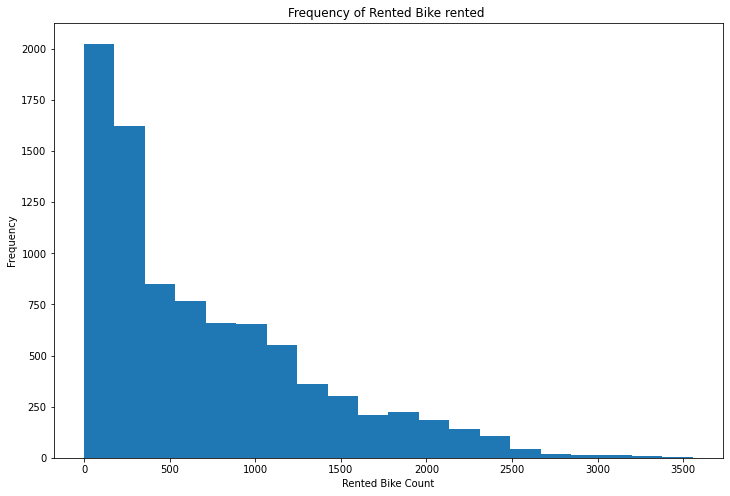

In [19]:
data['Rented Bike Count'].plot.hist(bins=20, figsize=(12,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Frequency of Rented Bike rented ')
plt.show()

Overall distribution of Rented Bike Count(Target Variable) with respect to each Season.

Text(0.5, 1.0, 'Distribution of Rented Bike Count for all seasons')

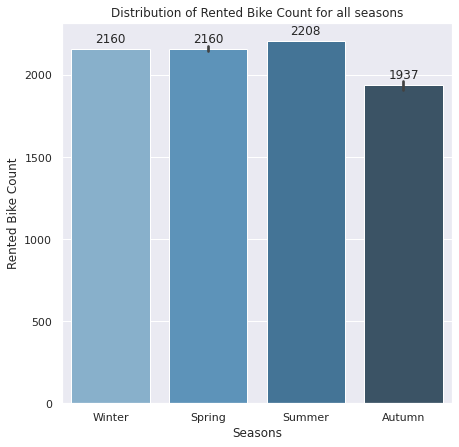

In [20]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(7,7)})
ax = sns.barplot(x="Seasons", y="Rented Bike Count", data=data, palette="Blues_d", estimator=np.count_nonzero)
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count for all seasons')

Overall distribution of Rented Bike Count(Target Variable) with respect to each Request Time Slot.

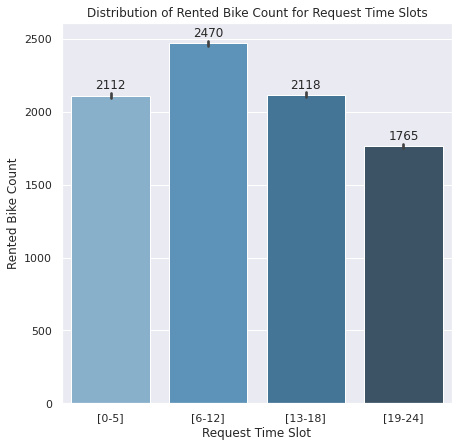

In [21]:
ax = sns.barplot(x="Request Time Slot", y="Rented Bike Count", data=data, palette="Blues_d", estimator=np.count_nonzero)
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Request Time Slot')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count for Request Time Slots')
plt.show()

Overall distribution of Rented Bike Count(Target Variable) with respect to Holiday.

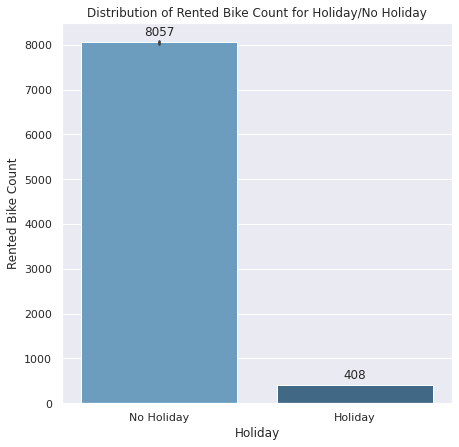

In [22]:
ax = sns.barplot(x="Holiday", y="Rented Bike Count", data=data, palette="Blues_d", estimator=np.count_nonzero)
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count for Holiday/No Holiday')
plt.show()

Overall distribution of Rented Bike Count(Target Variable) with respect to Rush Hour.

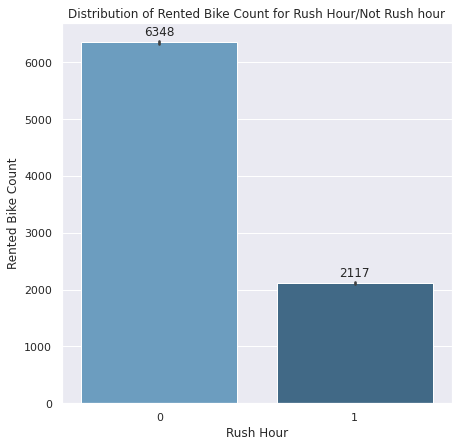

In [23]:
ax = sns.barplot(x="Rush Hour", y="Rented Bike Count", data=data, palette="Blues_d", estimator=np.count_nonzero)
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xlabel('Rush Hour')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count for Rush Hour/Not Rush hour')
plt.show()

Overall distribution of Rented Bike Count(Target Variable) with respect to Quarter.

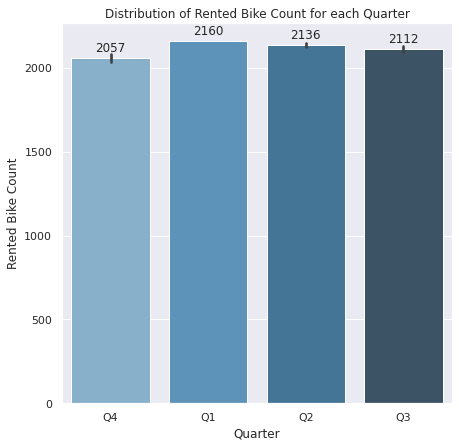

In [24]:
ax = sns.barplot(x="Quarter", y="Rented Bike Count", data=data, palette="Blues_d", estimator=np.count_nonzero)
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xlabel('Quarter')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count for each Quarter')
plt.show()

Overall distribution of Rented Bike Count(Target Variable) with respect to Functioning Day.

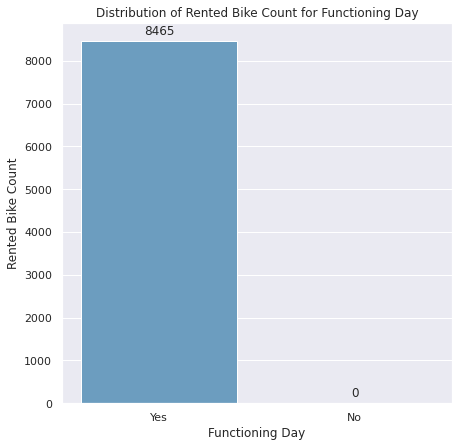

In [25]:
ax = sns.barplot(x="Functioning Day", y="Rented Bike Count", data=data, palette="Blues_d", estimator=np.count_nonzero)
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count for Functioning Day')
plt.show()

Overall distribution of Rented Bike Count(Target Variable) over the time.

Text(0.5, 1.0, 'Distribution of Rented Bike Count by Date')

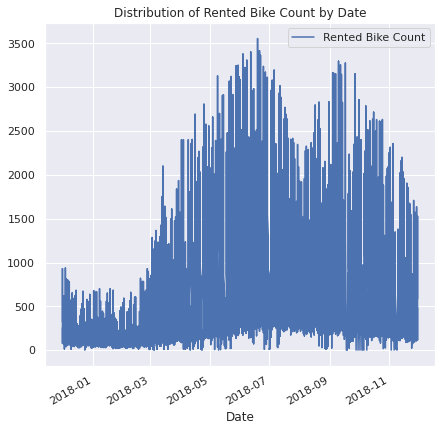

In [26]:
data.plot(x='Date',y='Rented Bike Count',kind='line')
plt.title('Distribution of Rented Bike Count by Date')

# There is high raise between april to autumm of bike rented

Overall distribution of Rented Bike Count(Target Variable) for temperature range.

Text(0.5, 1.0, 'Distribution of Rented Bike Count by Temperature')

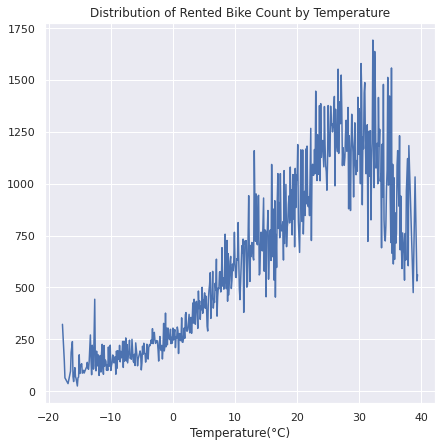

In [27]:
data.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()
plt.title('Distribution of Rented Bike Count by Temperature')
 
# when the temperature is low and high then the Bike count is low 

Overall distribution of Rented Bike Count(Target Variable) for Humidity(%) range.

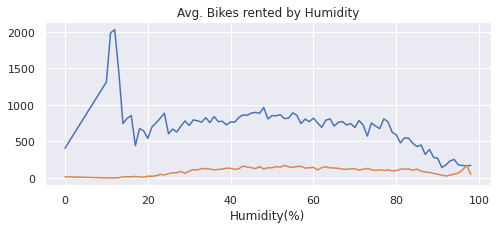

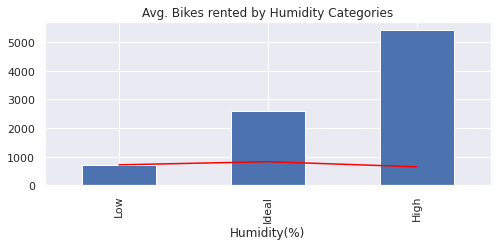

In [28]:
fig, ax = plt.subplots(figsize = (8,3))
data.groupby(['Humidity(%)']).mean()['Rented Bike Count'].plot()
data.groupby(['Humidity(%)']).count()['Rented Bike Count'].plot(title='Avg. Bikes rented by Humidity')

fig, ax = plt.subplots(figsize = (8,3))
data.groupby(pd.cut(data['Humidity(%)'],bins=[0,30,50,100],labels=['Low','Ideal','High'])).mean()['Rented Bike Count'].plot(color='red')
data.groupby(pd.cut(data['Humidity(%)'],bins=[0,30,50,100],labels=['Low','Ideal','High'])).count()['Rented Bike Count'].plot.bar(title='Avg. Bikes rented by Humidity Categories')

Overall distribution of Rented Bike Count(Target Variable) for Wind Speed(m/s) range.

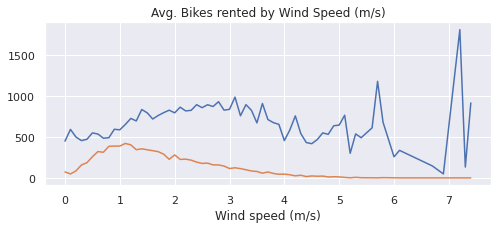

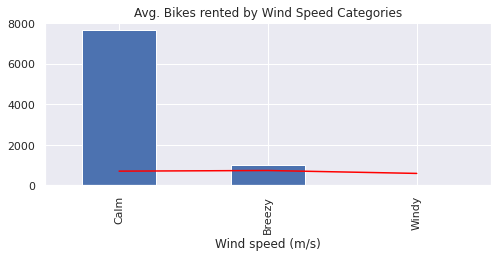

In [29]:
fig, ax = plt.subplots(figsize = (8,3))
data.groupby(['Wind speed (m/s)']).mean()['Rented Bike Count'].plot()
data.groupby(['Wind speed (m/s)']).count()['Rented Bike Count'].plot(title='Avg. Bikes rented by Wind Speed (m/s)')

fig, ax = plt.subplots(figsize = (8,3))
data.groupby(pd.cut(data['Wind speed (m/s)'],bins=[0,3,5,100],labels=['Calm','Breezy','Windy'])).mean()['Rented Bike Count'].plot(color='red')
data.groupby(pd.cut(data['Wind speed (m/s)'],bins=[0,3,5,100],labels=['Calm','Breezy','Windy'])).count()['Rented Bike Count'].plot.bar(title='Avg. Bikes rented by Wind Speed Categories')

Overall distribution of Rented Bike Count(Target Variable) for Visibility(10m) range.

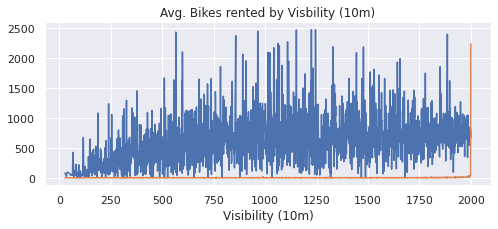

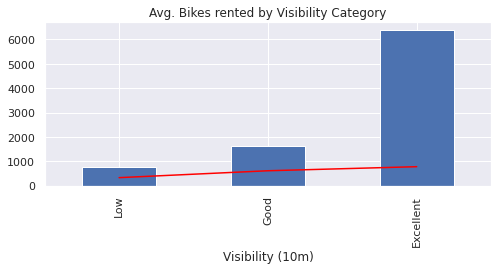

In [30]:
fig, ax = plt.subplots(figsize = (8,3))
data.groupby(['Visibility (10m)']).mean()['Rented Bike Count'].plot()
data.groupby(['Visibility (10m)']).count()['Rented Bike Count'].plot(title='Avg. Bikes rented by Visbility (10m)')

fig, ax = plt.subplots(figsize = (8,3))
data.groupby(pd.cut(data['Visibility (10m)'],bins=[0,400,1000,10000],labels=['Low','Good','Excellent'])).mean()['Rented Bike Count'].plot(color='red')
data.groupby(pd.cut(data['Visibility (10m)'],bins=[0,400,1000,10000],labels=['Low','Good','Excellent'])).count()['Rented Bike Count'].plot.bar(title='Avg. Bikes rented by Visibility Category')


Overall distribution of Rented Bike Count(Target Variable) for Rainfall(mm) range.

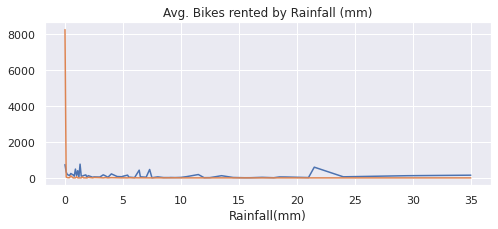

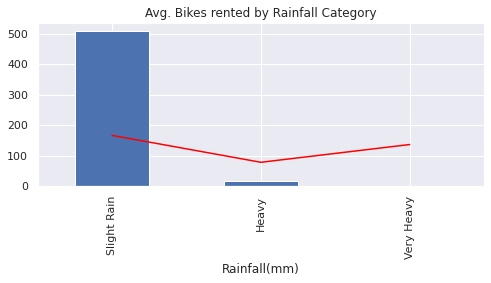

In [31]:
fig, ax = plt.subplots(figsize = (8,3))
data.groupby(['Rainfall(mm)']).mean()['Rented Bike Count'].plot()
data.groupby(['Rainfall(mm)']).count()['Rented Bike Count'].plot(title='Avg. Bikes rented by Rainfall (mm)')

fig, ax = plt.subplots(figsize = (8,3))
data.groupby(pd.cut(data['Rainfall(mm)'],bins=[0,12,24,35],labels=['Slight Rain','Heavy','Very Heavy'])).mean()['Rented Bike Count'].plot(color='red')
data.groupby(pd.cut(data['Rainfall(mm)'],bins=[0,12,24,35],labels=['Slight Rain','Heavy','Very Heavy'])).count()['Rented Bike Count'].plot.bar(title='Avg. Bikes rented by Rainfall Category')

#The higher the rainfall leads to a decrease in Rented Bikes 

Overall distribution of Rented Bike Count(Target Variable) for Solar Radiation (MJ/m2) range.

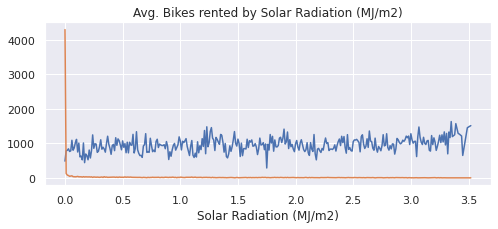

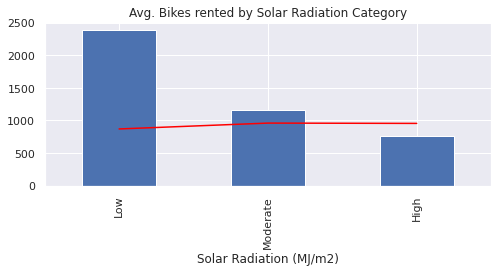

In [32]:
fig, ax = plt.subplots(figsize = (8,3))
data.groupby(['Solar Radiation (MJ/m2)']).mean()['Rented Bike Count'].plot()
data.groupby(['Solar Radiation (MJ/m2)']).count()['Rented Bike Count'].plot(title='Avg. Bikes rented by Solar Radiation (MJ/m2)')

fig, ax = plt.subplots(figsize = (8,3))
data.groupby(pd.cut(data['Solar Radiation (MJ/m2)'],bins=[0,1,2,3],labels=['Low','Moderate','High'])).mean()['Rented Bike Count'].plot(color='red')
data.groupby(pd.cut(data['Solar Radiation (MJ/m2)'],bins=[0,1,2,3],labels=['Low','Moderate','High'])).count()['Rented Bike Count'].plot.bar(title='Avg. Bikes rented by Solar Radiation Category')

#The higher the rainfall leads to a decrease in Rented Bikes 
# When solar radiation is low. The rented bike count is high. When solar radiation increases, the rented 
#bike count will decrease

Overall distribution of Rented Bike Count(Target Variable) for Solar Dew point temperature(°C) range.

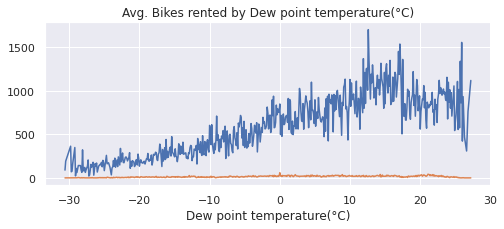

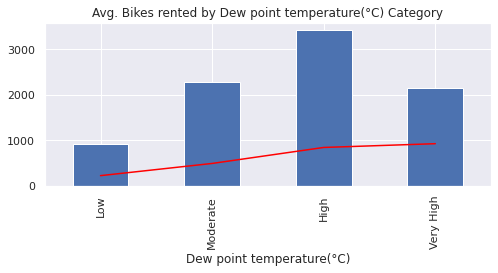

In [33]:
fig, ax = plt.subplots(figsize = (8,3))
data.groupby(['Dew point temperature(°C)']).mean()['Rented Bike Count'].plot()
data.groupby(['Dew point temperature(°C)']).count()['Rented Bike Count'].plot(title='Avg. Bikes rented by Dew point temperature(°C)')

fig, ax = plt.subplots(figsize = (8,3))
data.groupby(pd.cut(data['Dew point temperature(°C)'],bins=[-30,-15,0,15,30],labels=['Low','Moderate','High','Very High'])).mean()['Rented Bike Count'].plot(color='red')
data.groupby(pd.cut(data['Dew point temperature(°C)'],bins=[-30,-15,0,15,30],labels=['Low','Moderate','High','Very High'])).count()['Rented Bike Count'].plot.bar(title='Avg. Bikes rented by Dew point temperature(°C) Category')

#When the Dew Point Temperature is low and high then the rented bike count will be low 

Overall distribution of Rented Bike Count(Target Variable) for Snowfall (cm) range.

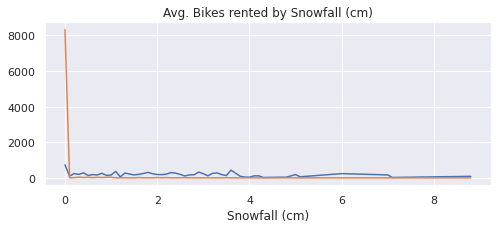

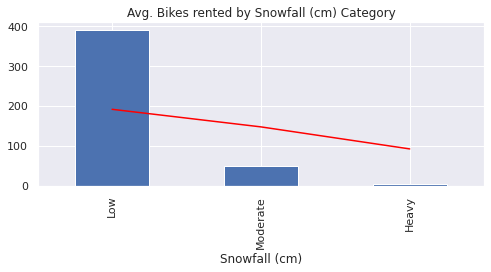

In [34]:
fig, ax = plt.subplots(figsize = (8,3))
data.groupby(['Snowfall (cm)']).mean()['Rented Bike Count'].plot()
data.groupby(['Snowfall (cm)']).count()['Rented Bike Count'].plot(title='Avg. Bikes rented by Snowfall (cm)')

fig, ax = plt.subplots(figsize = (8,3))
data.groupby(pd.cut(data['Snowfall (cm)'],bins=[0,3,6,9],labels=['Low','Moderate','Heavy'])).mean()['Rented Bike Count'].plot(color='red')
data.groupby(pd.cut(data['Snowfall (cm)'],bins=[0,3,6,9],labels=['Low','Moderate','Heavy'])).count()['Rented Bike Count'].plot.bar(title='Avg. Bikes rented by Snowfall (cm) Category')
#As snowfall increases, rented bike count will decrease 

# Data Tranformation for building Models

Deleting following columns: 
- Functioning Day - Contains only Yes values
- Date - Grouped instances into four quarters for 12 months
- Hour - Grouped instances into 4 Requests time slots

In [35]:
data.drop(['Functioning Day','Hour','Date'], inplace=True, axis=1)

In [36]:
data.head(3)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Quarter,Request Time Slot,Rush Hour
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Q4,[0-5],0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Q4,[0-5],0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Q4,[0-5],0


Moving target variable 'Rented Bike Count' at last index for improving accessibility

In [37]:
#Swapping positions of Seasons and Holiday columns for OneHotEncoding processing
columns_titles = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
                  'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Holiday','Rush Hour','Seasons','Quarter',
                  'Request Time Slot','Rented Bike Count']
data=data.reindex(columns=columns_titles)
print(data.columns)

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Rush Hour', 'Seasons', 'Quarter', 'Request Time Slot',
       'Rented Bike Count'],
      dtype='object')


Label encoding categorical variables 'Holiday' and 'Rush Hour' with binary values.

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Holiday']= labelencoder.fit_transform(data['Holiday']) 

In [39]:
data.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Rush Hour,Seasons,Quarter,Request Time Slot,Rented Bike Count
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,Winter,Q4,[0-5],254
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,Winter,Q4,[0-5],204
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,Winter,Q4,[0-5],173
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,Winter,Q4,[0-5],107
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,Winter,Q4,[0-5],78


Extracting input and target features into X and y respectively.

In [40]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values

Train test split on raw data for hypothesis analysis after model building

In [41]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X,y,test_size=0.3,random_state=0)

OneHotEncoding for categorical variables such as 'Seasons', 'Quarter', 'Request Time Slot'.

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col_trans = make_column_transformer((OneHotEncoder(), [10]), remainder='passthrough')
X = col_trans.fit_transform(X)

#Removing extra variable
X = X[:,1:]

In [43]:
col_trans = make_column_transformer((OneHotEncoder(), [13]), remainder='passthrough')
X = col_trans.fit_transform(X)

#Removing extra variable
X = X[:,1:]

In [44]:
col_trans = make_column_transformer((OneHotEncoder(), [16]), remainder='passthrough')
X = col_trans.fit_transform(X)

#Removing extra variable
X = X[:,1:]

# Train-Test Splitting and Normalizing the features on raw dataset

Train-Test splot (70-30) and normalizing the features to uniform scale.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Models on raw-cleaned dataset

Multiple Regression model using all features.

Multiple Regression

Root Mean Squared Error: 431.56


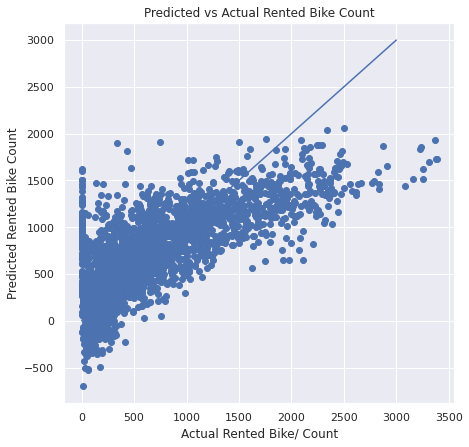

In [46]:
#Fitting Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
lrObj = LinearRegression()
lrObj.fit(X_train, y_train)

#Prediction on the Test Set
y_pred = lrObj.predict(X_test)

print("Multiple Regression")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_pred)
plt.plot(range(3000),range(3000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Polynomial Regression model using all features.

Polynomial Regression

 Root Mean Squared Error: 362.95


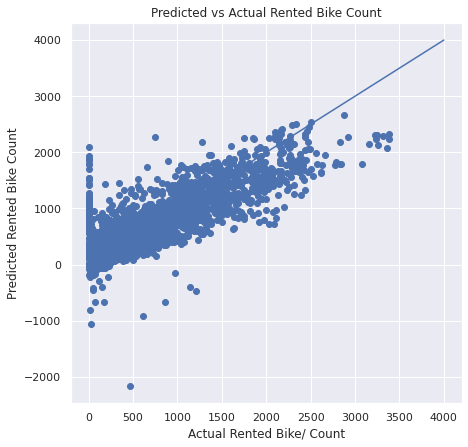

In [47]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
polyFeatureObj = PolynomialFeatures(degree=2)
X_poly = polyFeatureObj.fit_transform(X_train)
prObj = LinearRegression()
prObj.fit(X_poly, y_train)

#Prediction on the Test Set
y_pred = prObj.predict(polyFeatureObj.fit_transform(X_test))

print("Polynomial Regression")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
print("\n Root Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Regularized Regression model using Ridge.

Ridge Regularized Regression Model

Root Mean Squared Error: 359.23


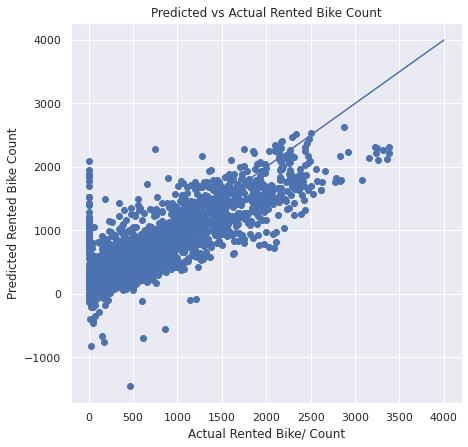

In [48]:
from sklearn.linear_model import Ridge
#Polynomial Regression with Ridge
ridgeObj = Ridge()
ridgeObj.fit(X_poly, y_train)

#Prediction on the Test Set
y_pred = ridgeObj.predict(polyFeatureObj.fit_transform(X_test))

print("Ridge Regularized Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Regularized Regression model using Lasso.

Lasso Regularized Regression Model

Root Mean Squared Error: 360.2


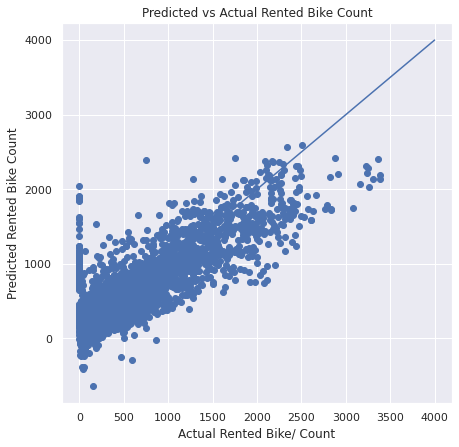

In [49]:
#Polynomial Regression with Lasso
from sklearn.linear_model import Lasso
lassoObj = Lasso()
lassoObj.fit(X_poly, y_train)

#Prediction on the Test Set
y_pred = lassoObj.predict(polyFeatureObj.fit_transform(X_test))

print("Lasso Regularized Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Regularized Regression model using Elastic Net.

Elastic Net Regularized Regression Model

Root Mean Squared Error: 360.2


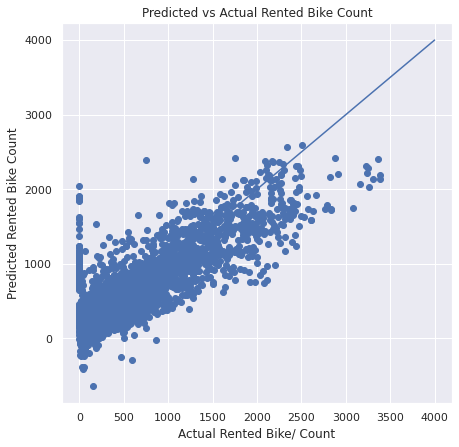

In [50]:
#Polynomial Regression with ElasticNet
from sklearn.linear_model import ElasticNet
enObj = ElasticNet(l1_ratio=1)
enObj.fit(X_poly, y_train)

#Prediction on the Test Set
y_pred = enObj.predict(polyFeatureObj.fit_transform(X_test))

print("Elastic Net Regularized Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Decision Tree Regression model.

Decision Tree Regression Model

Root Mean Squared Error: 443.55


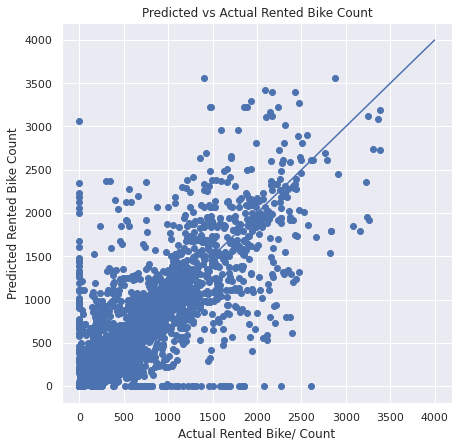

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtObj = DecisionTreeRegressor()
dtObj.fit(X_train,y_train) 

#Prediction on the Test Set
y_pred = dtObj.predict(X_test)

print("Decision Tree Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Random Forest Regression model.

Text(0.5, 1.0, 'RMSE vs n_estimators')

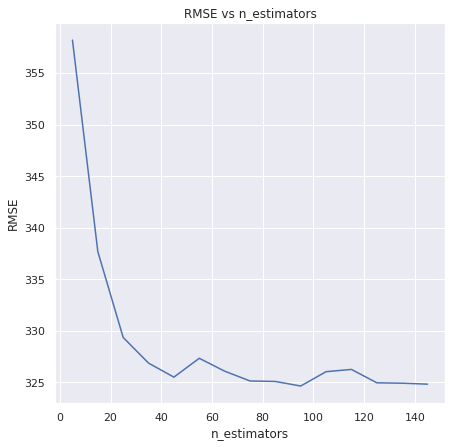

In [52]:
from sklearn.ensemble import RandomForestRegressor
n_est = []
rmse_lst = []
for i in range(5,150,10):
  rfObj = RandomForestRegressor(n_estimators=i)
  rfObj.fit(X_train,y_train)
  
  #Prediction on the Test Set
  y_pred = rfObj.predict(X_test)
  RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
  n_est.append(i)
  rmse_lst.append(RMSE)

#Plotting RMSE vs n_estimators
plt.plot(n_est,rmse_lst)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("RMSE vs n_estimators")

Based on the above plot for n_estimators between 125-135 we get the lowest RMSE. Hence, keeping n_estimators as 135.

Random Forest Regression Model

Root Mean Squared Error: 324.52


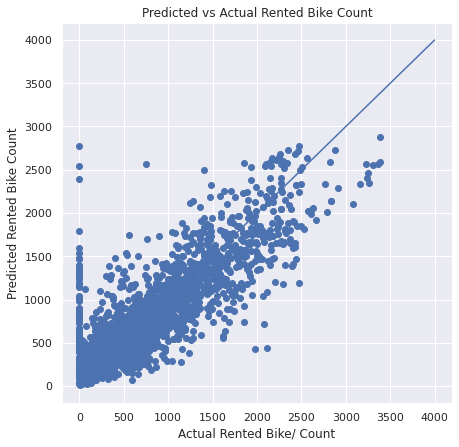

In [53]:
rfObj = RandomForestRegressor(n_estimators=135)
rfObj.fit(X_train,y_train)
  
#Prediction on the Test Set
y_pred = rfObj.predict(X_test)
y_pred_rf_best = y_pred
print("Random Forest Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Ensemble model with all the models implemented above.

Ensemble Regression Model

Root Mean Squared Error: 338.91


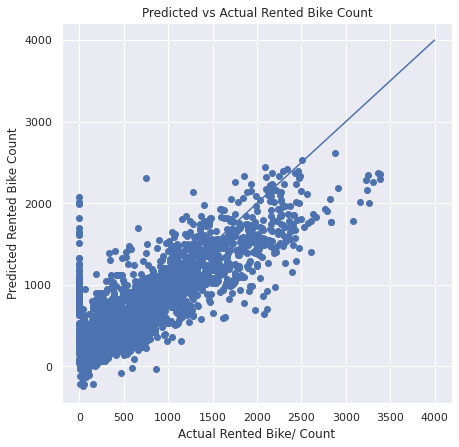

In [54]:
from collections import Counter

y_en_pred_raw = []

for x in X_test:
    x_poly = polyFeatureObj.fit_transform(x.reshape(1,-1))
    y_pred_lst = []
    y_pred_lst.append(lrObj.predict(x.reshape(1,-1)).item(0))  #Multiple Regression
    y_pred_lst.append(prObj.predict(x_poly).item(0))           #Polynomial Regression
    y_pred_lst.append(ridgeObj.predict(x_poly).item(0))        #Ridge Polynomial Regression
    y_pred_lst.append(lassoObj.predict(x_poly).item(0))        #Lasso Polynomial Regression
    y_pred_lst.append(enObj.predict(x_poly).item(0))           #Elastic Net Polynomial Regression
    y_pred_lst.append(dtObj.predict(x.reshape(1,-1)).item(0))  #Decision Tree Regression
    y_pred_lst.append(rfObj.predict(x.reshape(1,-1)).item(0))  #Random Forest Regression
    y_en_pred_raw.append(np.mean(y_pred_lst))

print("Ensemble Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test,y_en_pred_raw)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test,y=y_en_pred_raw)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

<b>Summary of RMSE for different models trained on raw dataset.</b>
- Multiple Regression - 431.56.
- Polynomial Regression - 362.95.
- Ridge Regularized Regression Model - 359.23.
- Lasso Regularized Regression Model - 360.2.
- Elastic Net Regularized Regression Model - 360.20.
- Decision Tree Regression model - 443.95.
- **Random Forest Regression model - 324.52.**
- Ensemble model - 338.91.

Random Forest Regression model gives lowest RMSE.Keeping predicted values in y_pred_rf_best.

# Feature Elimination using Backward Elimination Method

Eliminating features with larger p-values using backward elimination.

In [55]:
import statsmodels.api as sm
X_fs = np.append(arr=np.ones((len(X),1)).astype(int), values=X, axis=1)
X_fs = X_fs.astype('float64')


In [56]:
pd.DataFrame(X_fs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,1.0,1.0
8756,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,1.0,0.0
8757,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,1.0,0.0
8758,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,1.0,0.0


In [57]:

X_sig = X_fs[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()
obj_OLS.summary()

# Removing column6 as p-value is highest
X_sig = X_fs[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()
obj_OLS.summary()

# Removing column15 as p-value is highest
X_sig = X_fs[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,16,17,18,19]]
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()
obj_OLS.summary()

# Removing column12 as p-value is highest
X_sig = X_fs[:,[0,1,2,3,4,5,7,8,9,10,11,13,14,16,17,18,19]]
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()
obj_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     693.8
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:15:01   Log-Likelihood:                -65510.
No. Observations:                8760   AIC:                         1.311e+05
Df Residuals:                    8743   BIC:                         1.312e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        747.2515     96.036      7.781      0.000     558.999     935.504
x1           274.6432     16.774     16.373      0.000     241.763     307.524
x2           495.1978     14.299     34.632      0.000     467.169     523.227
x3           108.5989     14.064      7.722      0.000      81.029     136.169
x4           174.6344     17.617      9.913      0.000     140.100     209.168
x5          -229.0393     21.584    -10.612      0.000    -271.348    -186.730
x6          -222.7864     16.230    -13.727      0.000    -254.601    -190.971
x7           -89.7810     17.280     -5.196      0.000    -123.654     -55.908
x8          -238.1144     20.229    -11.771      0.000    -277.769    -198.460
x9            12.4878      3.618      3.452      0.001       5.396      19.580
x10          -10.9642      1.023    -10.715      0.000     -12.970      -8.958
x11            0.0679      0.011      6.396      0.000       0.047       0.089
x12           18.3108      3.787      4.835      0.000      10.887      25.734
x13          -55.4825      4.240    -13.084      0.000     -63.795     -47.170
x14           43.0207     11.086      3.881      0.000      21.290      64.751
x15          139.9061     21.391      6.540      0.000      97.975     181.837
x16          331.9370     11.787     28.162      0.000     308.832     355.042
==============================================================================
Omnibus:                      380.512   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.619
Skew:                           0.256   Prob(JB):                    9.97e-197
Kurtosis:                       4.487   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Train-Test Splitting and Normalizing the feature eliminated dataset



```
# This is formatted as code
```

Train-Test splot (70-30) and normalizing the features to uniform scale.

In [58]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(X_sig,y,test_size=0.3,random_state=0)

In [59]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_sig = sc_X.fit_transform(X_train_sig)
X_test_sig = sc_X.transform(X_test_sig)

# Models after feature elimination.

Multiple Regression model using selected features.

Multiple Regression

Root Mean Squared Error: 431.44


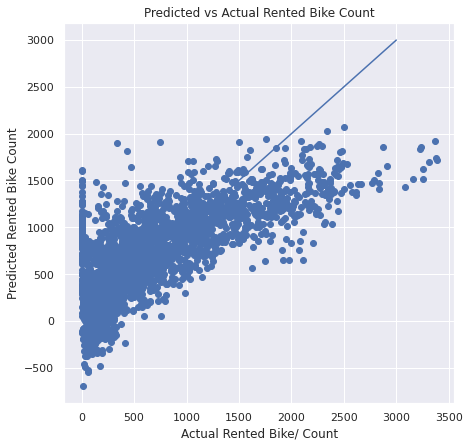

In [60]:
#Fitting Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
lrObj = LinearRegression()
lrObj.fit(X_train_sig, y_train_sig)

#Prediction on the Test Set
y_pred = lrObj.predict(X_test_sig)

print("Multiple Regression")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(3000),range(3000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Polynomial Regression model using selected features.

Polynomial Regression

 Root Mean Squared Error: 372.24


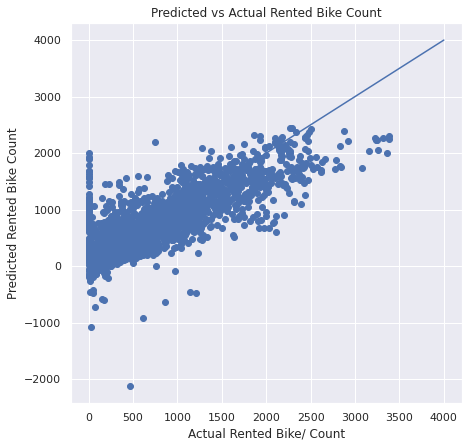

In [61]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
polyFeatureObj = PolynomialFeatures(degree=2)
X_poly = polyFeatureObj.fit_transform(X_train_sig)
prObj = LinearRegression()
prObj.fit(X_poly, y_train_sig)

#Prediction on the Test Set
y_pred = prObj.predict(polyFeatureObj.fit_transform(X_test_sig))

print("Polynomial Regression")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\n Root Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Regularized Regression model using Ridge.

Ridge Regularized Regression Model

Root Mean Squared Error: 369.04


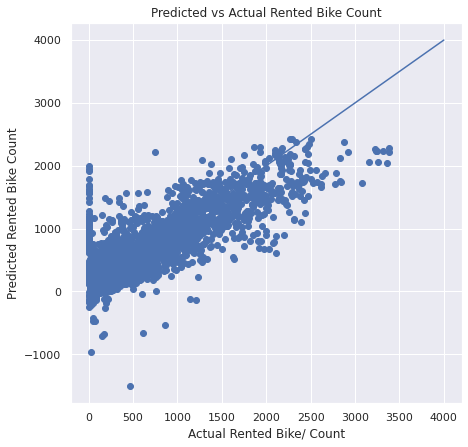

In [62]:
from sklearn.linear_model import Ridge
#Polynomial Regression with Ridge
ridgeObj = Ridge()
ridgeObj.fit(X_poly, y_train_sig)

#Prediction on the Test Set
y_pred = ridgeObj.predict(polyFeatureObj.fit_transform(X_test_sig))

print("Ridge Regularized Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Regularized Regression model using Lasso.

Lasso Regularized Regression Model

Root Mean Squared Error: 369.76


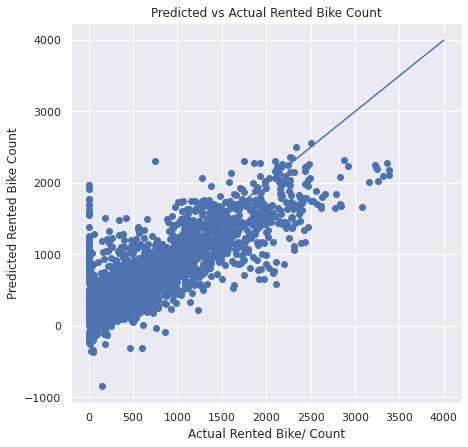

In [63]:
#Polynomial Regression with Lasso
from sklearn.linear_model import Lasso
lassoObj = Lasso()
lassoObj.fit(X_poly, y_train_sig)

#Prediction on the Test Set
y_pred = lassoObj.predict(polyFeatureObj.fit_transform(X_test_sig))

print("Lasso Regularized Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Regularized Regression model using Elastic Net.

Elastic Net Regularized Regression Model

Root Mean Squared Error: 369.76


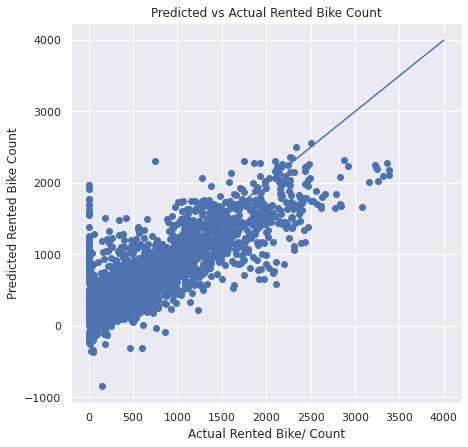

In [64]:
#Polynomial Regression with ElasticNet
from sklearn.linear_model import ElasticNet
enObj = ElasticNet(l1_ratio=1)
enObj.fit(X_poly, y_train_sig)

#Prediction on the Test Set
y_pred = enObj.predict(polyFeatureObj.fit_transform(X_test_sig))

print("Elastic Net Regularized Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Decision Tree Regression model.

Decision Tree Regression Model

Root Mean Squared Error: 442.09


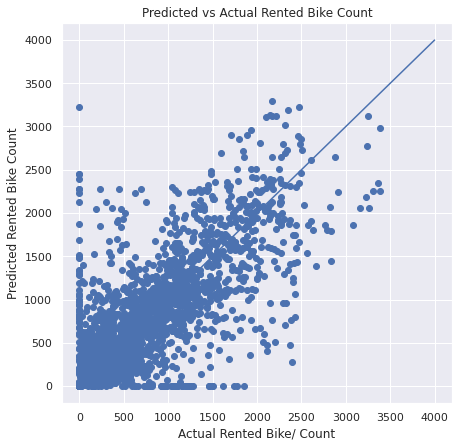

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtObj = DecisionTreeRegressor()
dtObj.fit(X_train_sig,y_train_sig) 

#Prediction on the Test Set
y_pred = dtObj.predict(X_test_sig)

print("Decision Tree Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Random Forest Regression model.

Text(0.5, 1.0, 'RMSE vs n_estimators')

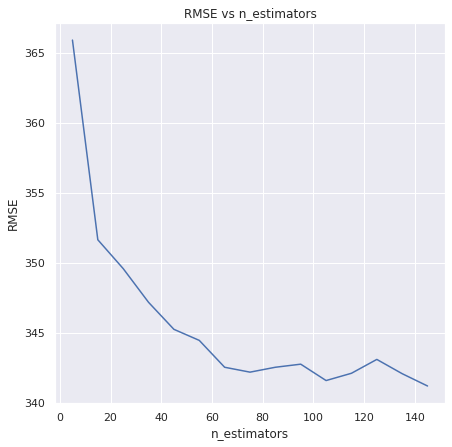

In [66]:
from sklearn.ensemble import RandomForestRegressor
n_est = []
rmse_lst = []
for i in range(5,150,10):
  rfObj = RandomForestRegressor(n_estimators=i)
  rfObj.fit(X_train_sig,y_train_sig)
  
  #Prediction on the Test Set
  y_pred = rfObj.predict(X_test_sig)
  RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
  n_est.append(i)
  rmse_lst.append(RMSE)

#Plotting RMSE vs n_estimators
plt.plot(n_est,rmse_lst)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("RMSE vs n_estimators")

Based on the above plot for n_estimators between 120-135 we get the lowest RMSE. Hence, keeping n_estimators as 130.

Random Forest Regression Model

Root Mean Squared Error: 341.01


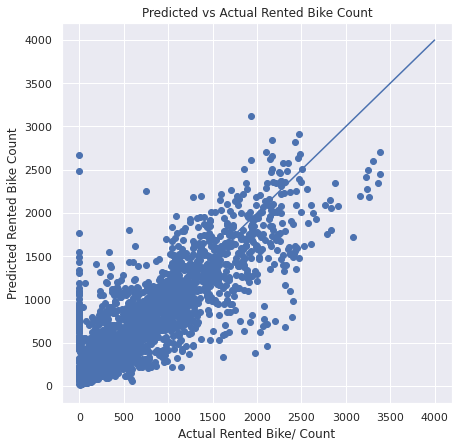

In [67]:
rfObj = RandomForestRegressor(n_estimators=130)
rfObj.fit(X_train_sig,y_train_sig)

#Prediction on the Test Set
y_pred = rfObj.predict(X_test_sig)

print("Random Forest Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Ensemble model with all the models implemented above.

Ensemble Regression Model

Root Mean Squared Error: 348.64


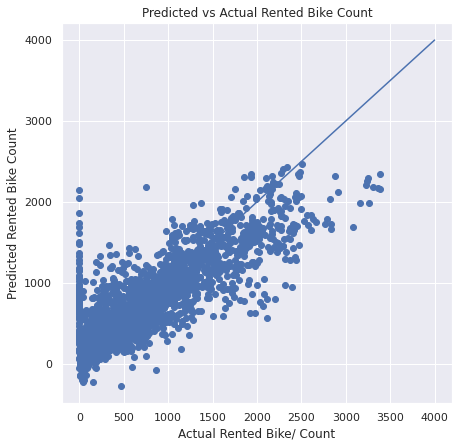

In [68]:
from collections import Counter

y_en_pred = []

for x in X_test_sig:
    x_poly = polyFeatureObj.fit_transform(x.reshape(1,-1))
    y_pred_lst = []
    y_pred_lst.append(lrObj.predict(x.reshape(1,-1)).item(0))  #Multiple Regression
    y_pred_lst.append(prObj.predict(x_poly).item(0))           #Polynomial Regression
    y_pred_lst.append(ridgeObj.predict(x_poly).item(0))        #Ridge Polynomial Regression
    y_pred_lst.append(lassoObj.predict(x_poly).item(0))        #Lasso Polynomial Regression
    y_pred_lst.append(enObj.predict(x_poly).item(0))           #Elastic Net Polynomial Regression
    y_pred_lst.append(dtObj.predict(x.reshape(1,-1)).item(0))  #Decision Tree Regression
    y_pred_lst.append(rfObj.predict(x.reshape(1,-1)).item(0))  #Random Forest Regression
    y_en_pred.append(np.mean(y_pred_lst))

print("Ensemble Regression Model")

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_en_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_en_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

<b>Summary of RMSE for different models trained on feature eliminated dataset.</b>
- Multiple Regression - 431.44.
- Polynomial Regression - 372.24.
- Ridge Regularized Regression Model - 369.04.
- Lasso Regularized Regression Model - 369.76.
- Elastic Net Regularized Regression Model - 369.76.
- Decision Tree Regression model - 442.09.
- **Random Forest Regression model - 341.01.**
- Ensemble model - 348.64.

Random Forest Regression model gives lowest RMSE.

# Feature Extraction - PCA

Principal Component Analysis using 13 components.

[0.23432761 0.13542491 0.1138444  0.08909785 0.07672113 0.06302597
 0.0592362  0.05737105 0.04960501 0.04389293 0.02603855 0.01996785
 0.01406712]

Root Mean Squared Error: 432.02


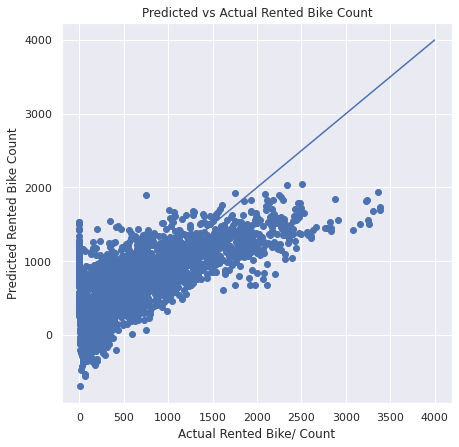

In [69]:
# Fitting PCA to Training Set
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=13)
X_train_pc = pcaObj.fit_transform(X_train_sig)
X_test_pc = pcaObj.transform(X_test_sig)
components_variance = pcaObj.explained_variance_ratio_
print(components_variance)

#Fitting Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
lrObj = LinearRegression()
lrObj.fit(X_train_pc, y_train_sig)

#Prediction on the Test Set
y_pred = lrObj.predict(X_test_pc)

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

Kernel principal component analysis


Root Mean Squared Error: 444.71


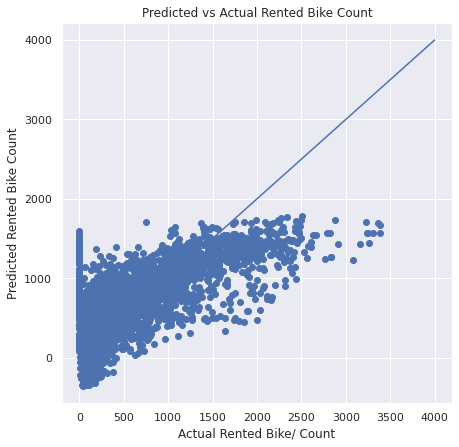

In [70]:
# Fitting RBF Kernel PCA to Training Set
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=14, kernel='rbf')
X_train_pc = kernelPCAObj.fit_transform(X_train_sig)
X_test_pc = kernelPCAObj.transform(X_test_sig)
# components_variance = kernelPCAObj.explained_variance_ratio_
# print(components_variance)

#Fitting Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
lrObj = LinearRegression()
lrObj.fit(X_train_pc, y_train_sig)

#Prediction on the Test Set
y_pred = lrObj.predict(X_test_pc)

#Calculating RMSE
RMSE = np.round(np.sqrt(np.square(np.subtract(y_test_sig,y_pred)).mean()),2)
print("\nRoot Mean Squared Error: "+str(RMSE))

#Plotting Actual vs Predicted values for Rented Bike Count
plt.scatter(x=y_test_sig,y=y_pred)
plt.plot(range(4000),range(4000))
plt.title("Predicted vs Actual Rented Bike Count")
plt.xlabel("Actual Rented Bike/ Count")
plt.ylabel("Predicted Rented Bike Count")
plt.show()

RMSE with PCA is 432.02.

RMSE with kernel PCA is 444.71.

# Best Model selection

RMSE with models on raw dataset.
- Multiple Regression - 431.56.
- Polynomial Regression - 362.95.
- Ridge Regularized Regression Model - 359.23.
- Lasso Regularized Regression Model - 360.20.
- Elastic Net Regularized Regression Model - 360.20.
- Decision Tree Regression model - 443.95.
- **Random Forest Regression model - 324.52.**
- Ensemble model - 338.91.

RMSE with models on feature eliminated dataset.
- Multiple Regression - 431.44.
- Polynomial Regression - 372.24.
- Ridge Regularized Regression Model - 369.04.
- Lasso Regularized Regression Model - 369.76.
- Elastic Net Regularized Regression Model - 369.76.
- Decision Tree Regression model - 442.09.
- **Random Forest Regression model - 342.01.**
- Ensemble model - 348.64.

RMSE with models on feature eliminated dataset with PCA.
* **Linear Regression with PCA - 432.02.**
* Linear Regression kernel PCA is - 444.71.

**Best model is Random Forest Regression model on raw dataset as it gives lowest RMSE of 324.52 as compared to others.**

Note: Using y_pred_rf_best for predicted values.

# Hypothesis questions analysis using predicted values

Combing X_test_f with predicted values(y_en_pred_raw) from ensemble model on raw dataset.

In [71]:
X_test_f = pd.DataFrame(X_test_f)
X_test_f.columns = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
                  'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Holiday','Rush Hour','Seasons','Quarter',
                  'Request Time Slot']
X_test_f['Predicted Rented Bike Count'] = y_pred_rf_best

Validating the final data frame with predicted values

In [72]:
X_test_f.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Rush Hour,Seasons,Quarter,Request Time Slot,Predicted Rented Bike Count
0,10.7,73,1.3,2000,6,0,0,0,1,0,Spring,Q2,[0-5],340.133333
1,21.7,78,1,2000,17.6,0,0,0,1,0,Autumn,Q3,[0-5],491.096296
2,3.6,65,4.3,1061,-2.3,0.03,0,0.4,1,1,Winter,Q4,[13-18],574.459259
3,-9.7,51,2.8,2000,-17.9,0,0,0,1,0,Winter,Q1,[19-24],179.266667
4,33.6,58,3.6,1448,24.1,1.98,0,0,1,0,Summer,Q3,[13-18],741.703704


Hypthesis 1: Summer season has the most bike rentals.

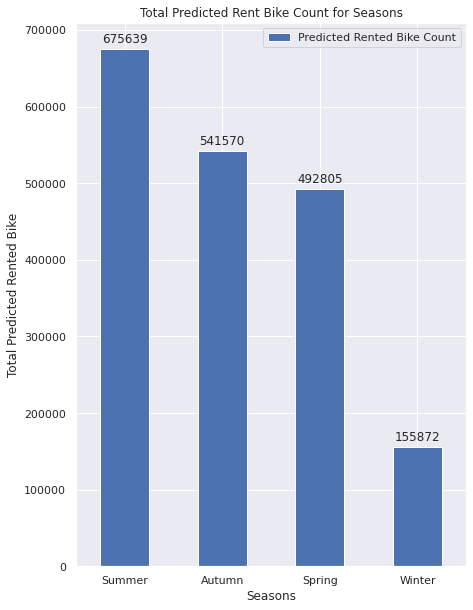

In [73]:
df_flat = X_test_f.groupby(by=['Seasons'])['Predicted Rented Bike Count'].sum().reset_index()
ax = df_flat.sort_values(['Predicted Rented Bike Count'], ascending=False).plot(kind='bar', y='Predicted Rented Bike Count', x='Seasons',legend=True,figsize=(7, 10))
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2, p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Seasons')
plt.ylabel('Total Predicted Rented Bike')
plt.title('Total Predicted Rent Bike Count for Seasons')
plt.show()

Hypothesis 2: Rush hours (0600-0800 and 1700–1900) has the most bike rentals. 

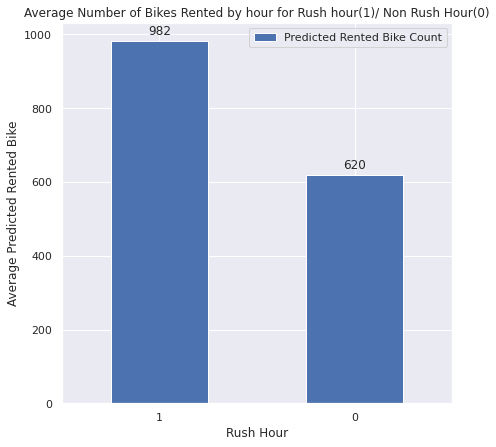

In [74]:
df_flat = X_test_f.groupby(by=['Rush Hour'])['Predicted Rented Bike Count'].mean().reset_index()
ax = df_flat.sort_values(['Predicted Rented Bike Count'], ascending=False).plot(kind='bar', y='Predicted Rented Bike Count', x='Rush Hour',legend=True,figsize=(7,7))
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2, p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Rush Hour')
plt.ylabel('Average Predicted Rented Bike')
plt.title('Average Number of Bikes Rented by hour for Rush hour(1)/ Non Rush Hour(0)')
plt.show()

#1 - Rush Hour
#0 - Not a Rush Hour

Hypothesis 3: ‘No Holiday’ weekdays have the most bike rentals.

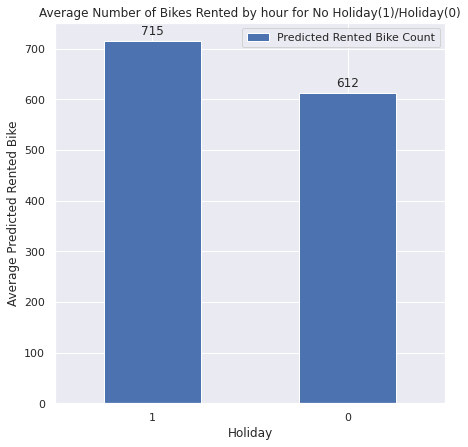

In [75]:
df_flat = X_test_f.groupby(by=['Holiday'])['Predicted Rented Bike Count'].mean().reset_index()
ax = df_flat.sort_values(['Predicted Rented Bike Count'], ascending=False).plot(kind='bar', y='Predicted Rented Bike Count', x='Holiday',legend=True,figsize=(7,7))
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Holiday')
plt.ylabel('Average Predicted Rented Bike')
plt.title('Average Number of Bikes Rented by hour for No Holiday(1)/Holiday(0)')
plt.show()

#1 - No Holiday
#0 - Holiday

Hypothesis 4: How many were rented in each quarter of the year?

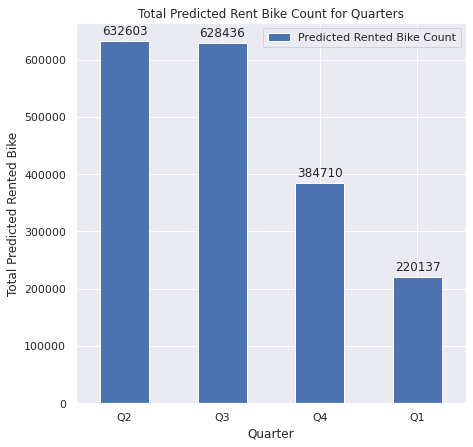

In [76]:
df_flat = X_test_f.groupby(by=['Quarter'])['Predicted Rented Bike Count'].sum().reset_index()
ax = df_flat.sort_values(['Predicted Rented Bike Count'], ascending=False).plot(kind='bar', y='Predicted Rented Bike Count', x='Quarter',legend=True,figsize=(7,7))
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Quarter')
plt.ylabel('Total Predicted Rented Bike')
plt.title('Total Predicted Rent Bike Count for Quarters')
plt.show()

Hypothesis 5: Bike rentals are low for extreme hot and cold temperature.

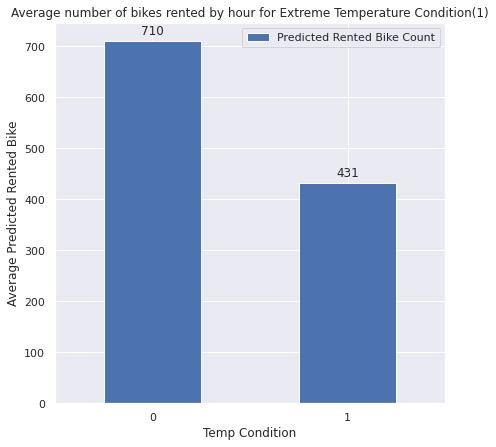

In [77]:
def set_temp(x):
  if x in (range(-20,-10)) or x in range(36,50) :
    return 1
  else:
    return 0

X_test_f['Temp Condition'] = X_test_f['Temperature(°C)'].apply(set_temp)

df_flat = X_test_f.groupby(by=['Temp Condition'])['Predicted Rented Bike Count'].mean().reset_index()
ax = df_flat.sort_values(['Predicted Rented Bike Count'], ascending=False).plot(kind='bar', y='Predicted Rented Bike Count', x='Temp Condition',legend=True,figsize=(7,7))
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Temp Condition')
plt.ylabel('Average Predicted Rented Bike')
plt.title('Average number of bikes rented by hour for Extreme Temperature Condition(1)')
plt.show()

Hypothesis 6: Bike rentals are low for rainy days with poor visibility.

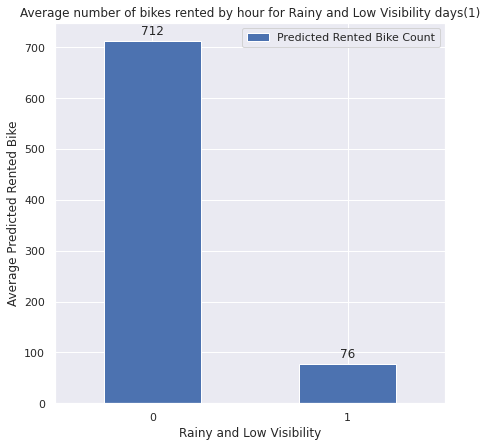

In [78]:
def set_rainyLvisDay(x):
  if (x['Visibility (10m)'] in range(0,401)) & (x['Rainfall(mm)']>=5):
    return 1
  else:
    return 0

X_test_f['Rainy and Low Vis'] = X_test_f.apply(set_rainyLvisDay,axis=1)

df_flat = X_test_f.groupby(by=['Rainy and Low Vis'])['Predicted Rented Bike Count'].mean().reset_index()
ax = df_flat.sort_values(['Predicted Rented Bike Count'], ascending=False).plot(kind='bar', y='Predicted Rented Bike Count', x='Rainy and Low Vis',legend=True,figsize=(7,7))
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Rainy and Low Visibility')
plt.ylabel('Average Predicted Rented Bike')
plt.title('Average number of bikes rented by hour for Rainy and Low Visibility days(1)')
plt.show()

#1-Rainy and low visibility
#0 - Not a rainy day with low visibility

Hypothesis 7: A snowy day with low visibility will have the low bike rentals.

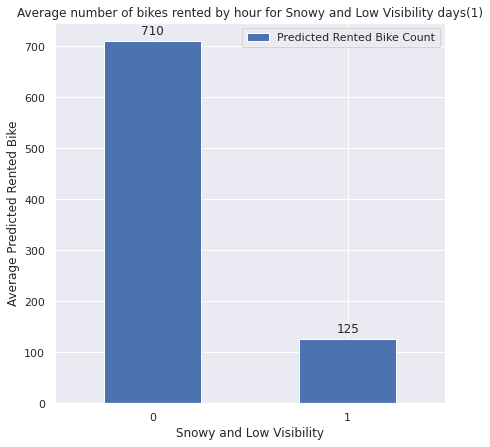

In [79]:
df_snowy = X_test_f[(X_test_f['Snowfall (cm)'].isin(range(1,10))) & (X_test_f['Seasons']=='Winter') & (X_test_f['Visibility (10m)'].isin(range(0,401)))]

def set_snowyLvisDay(x):
  if (x['Visibility (10m)'] in range(0,401)) & (x['Snowfall (cm)'] in range(1,10)):
    return 1
  else:
    return 0

X_test_f['Snowy and Low Vis'] = X_test_f.apply(set_snowyLvisDay,axis=1)

df_flat = X_test_f.groupby(by=['Snowy and Low Vis'])['Predicted Rented Bike Count'].mean().reset_index()
ax = df_flat.sort_values(['Predicted Rented Bike Count'], ascending=False).plot(kind='bar', y='Predicted Rented Bike Count', x='Snowy and Low Vis',legend=True,figsize=(7,7))
for p in ax.patches:                 
  ax.annotate(np.round(int(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Snowy and Low Visibility')
plt.ylabel('Average Predicted Rented Bike')
plt.title('Average number of bikes rented by hour for Snowy and Low Visibility days(1)')
plt.show()

#1-Snowy and low visibility
#0 - Not a snowy day with low visibility